In [2]:
import json
from collections import Set
import numpy as np

with open("data/train.json") as json_file:
    training_data = json.load(json_file)
    ingredient_set = []
    cuisine_set = []
    for data_point in training_data:
        for ingredient in data_point["ingredients"]:
            ingredient_set.append(ingredient)
            
            cuisine_set.append(data_point["cuisine"])
    
    ingredient_set = set(ingredient_set)
    cuisine_set = set(cuisine_set)
    
    ingredient_array = list(ingredient_set)
    cuisine_array = list(cuisine_set)
    
    #ingredient_array is a list of all possible ingredients in all recipes
    #cuisine_array is a list of all possible cuisines in all recipes
    
    # setting up data_matrix
    
    training_input_matrix = np.empty(shape = (len(training_data),len(ingredient_array)))
    training_output_matrix = np.empty(shape = (len(training_data),len(cuisine_array)))
    
    for i, data_point in enumerate(training_data):
        ingredients = data_point["ingredients"]
        
        ingredients_vector = np.zeros(shape=(len(ingredient_array)))
        cuisine_vector = np.zeros(shape=(len(cuisine_array)))
        
        for ingredient in ingredients:
            ingredients_vector[ingredient_array.index(ingredient)] = 1
        
        cuisine_vector[cuisine_array.index(data_point["cuisine"])] = 1
        
        training_input_matrix[i] = ingredients_vector
        training_output_matrix[i] = cuisine_vector


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=len(ingredient_array)))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_input_matrix, training_output_matrix, validation_split=0.20, epochs=20, batch_size=256)

Train on 31819 samples, validate on 7955 samples
Epoch 1/20
31819/31819 [==============================] - 5s 155us/step - loss: 2.1356 - acc: 0.4767 - val_loss: 1.4755 - val_acc: 0.5964
Epoch 2/20
31819/31819 [==============================] - 4s 131us/step - loss: 1.2030 - acc: 0.6684 - val_loss: 1.0395 - val_acc: 0.7004
Epoch 3/20
31819/31819 [==============================] - 4s 133us/step - loss: 0.9053 - acc: 0.7421 - val_loss: 0.8909 - val_acc: 0.7453
Epoch 4/20
31819/31819 [==============================] - 4s 135us/step - loss: 0.7709 - acc: 0.7804 - val_loss: 0.8245 - val_acc: 0.7659
Epoch 5/20
31819/31819 [==============================] - 5s 150us/step - loss: 0.6900 - acc: 0.8019 - val_loss: 0.7952 - val_acc: 0.7684
Epoch 6/20
31819/31819 [==============================] - 4s 137us/step - loss: 0.6323 - acc: 0.8159 - val_loss: 0.7752 - val_acc: 0.7740
Epoch 7/20
31819/31819 [==============================] - 4s 131us/step - loss: 0.5881 - acc: 0.8284 - val_loss: 0.7571 - v

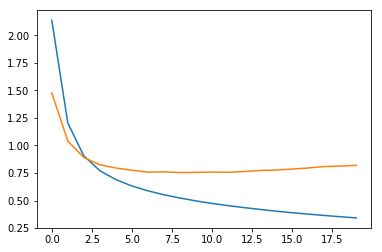

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()